In [2]:
import ot
import ot.plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Langevin_1D.csv', header=None)

max:  1.72518730163574
min:  -1.74645888805389


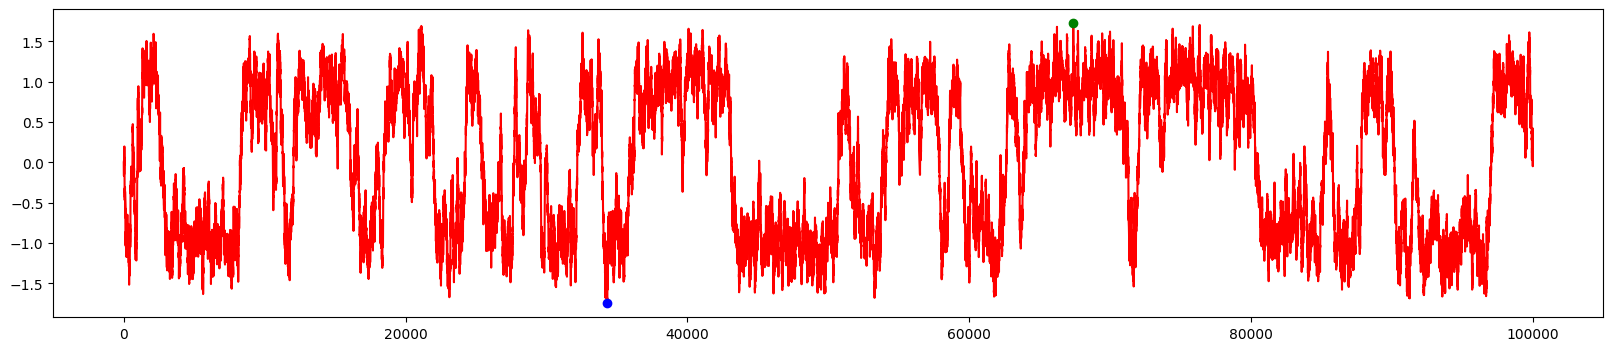

In [4]:
#Plot out data

plt.figure(1, figsize=(20, 4))
plt.plot(data, 'r')

plt.plot(np.argmax(data[0]), max(data[0]), 'og')
plt.plot(np.argmin(data[0]), min(data[0]), 'ob')
print("max: ", max(data[0]))
print("min: ", min(data[0]))

In [36]:
plt.figure(1, figsize=(6.4, 3))

#Split data into discrete trajectory bins by time steps
time_bins = np.array_split(np.array(data), 1000)

print(len(time_bins[0]))

100


<Figure size 640x300 with 0 Axes>

In [37]:
#Calculate Wasserstein distance between two time steps
def Wasserstein_distance(ts1, ts2, start, stop, size):
    if (ts1 > ts2):
        return "error"
    
    a = plt.hist(time_bins[ts1], range=(start,stop), bins=size)
    b = plt.hist(time_bins[ts2], range=(start,stop), bins=size)
    
    M = ot.dist(time_bins[ts1],time_bins[ts2])
    
    #Wd = ot.emd2(a[0]/size, b[0]/size, M)
    Wd = ot.emd2(a[0], b[0], M)
    
    return Wd

#Plot distribution of two adjacent time bins
def compare_dist(ts1, ts2):
    if (ts1 > ts2):
        return "error"
    
    sns.distplot(time_bins[ts1],bins=100,kde=True)
    sns.distplot(time_bins[ts2],bins=100,kde=True)

#Plot trajectory of two adjacent time bins
def compare_traj(ts1,ts2): 
    if (ts1 > ts2):
        return "error"
    
    plt.plot(time_bins[ts1], 'b')
    plt.plot(time_bins[ts2], 'orange')

98.71253871115631

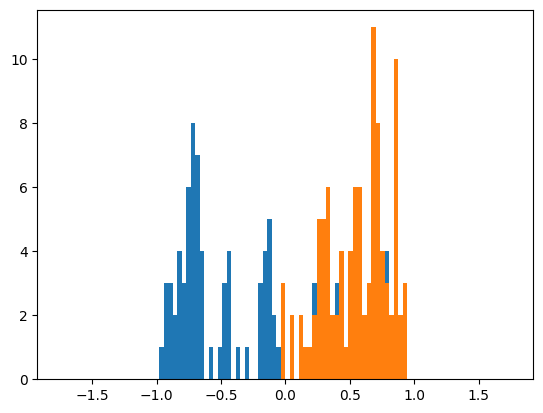

In [7]:
Wasserstein_distance(9, 10, -1.75, 1.75, 100)

Wasserstein distance between time step:  0  and  100  is:  92.57415827507977
Wasserstein distance between time step:  100  and  200  is:  2.616881883221847
Wasserstein distance between time step:  200  and  300  is:  4.331589410961116
Wasserstein distance between time step:  300  and  400  is:  8.871839382688446
Wasserstein distance between time step:  400  and  500  is:  69.68514512986036
Wasserstein distance between time step:  500  and  600  is:  29.354553564575163
Wasserstein distance between time step:  600  and  700  is:  20.643221017221695
Wasserstein distance between time step:  700  and  800  is:  65.56522547764052
Wasserstein distance between time step:  800  and  900  is:  43.78028891973866
Wasserstein distance between time step:  900  and  1000  is:  98.71253871115631
Wasserstein distance between time step:  1000  and  1100  is:  1.5274492114016096
Wasserstein distance between time step:  1100  and  1200  is:  1.3479843240136118
Wasserstein distance between time step:  1200

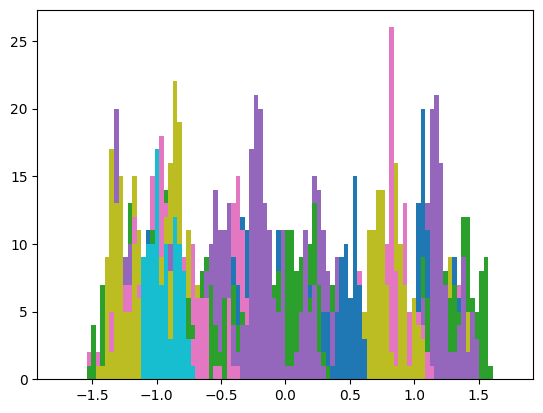

In [38]:
dist = []
for i in range(0,50):
    wd = Wasserstein_distance(i, i+1, -1.75, 1.75, 100)
    print("Wasserstein distance between time step: ", i*100, " and ",  (i+1)*100, " is: ", wd)
    dist.append(wd)

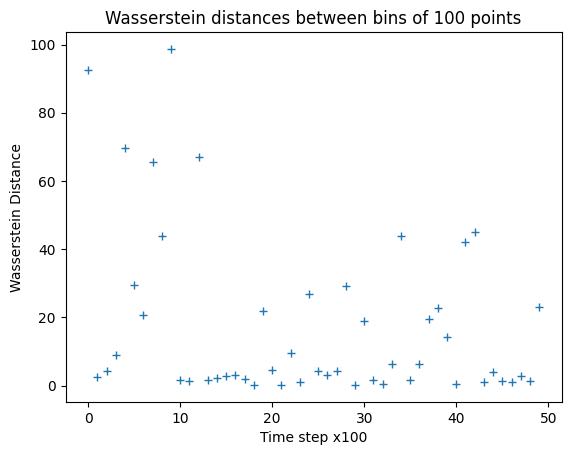

In [45]:
plt.title("Wasserstein distances between bins of 100 points")
plt.xlabel("Time step x100")
plt.ylabel("Wasserstein Distance")
plt.plot(dist, '+')

In [42]:
#W2 distance starts at left time point (ie. t1 = i and t2 = i+1)
roc = []
for j in range(len(dist) - 1):
    x = (dist[j+1] - dist[j])/100
    roc.append(x)

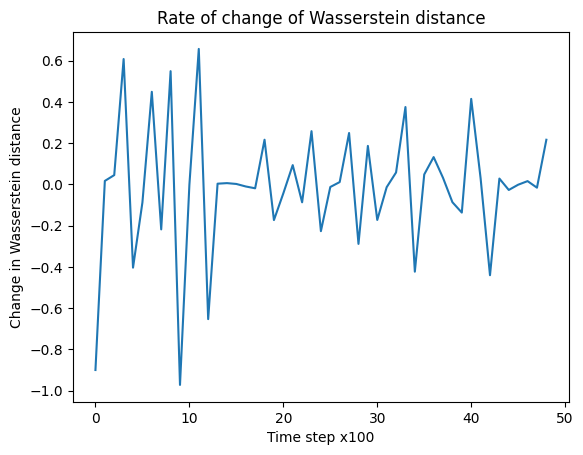

In [46]:
plt.title("Rate of change in Wasserstein distance")
plt.xlabel("Time step x100")
plt.ylabel("Change in Wasserstein distance")
plt.plot(roc)

In [16]:
#W2 distance starts at left time point (ie. t1 = i)
print(max(dist))
print(np.argmax(dist))

98.71253871115631
9


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


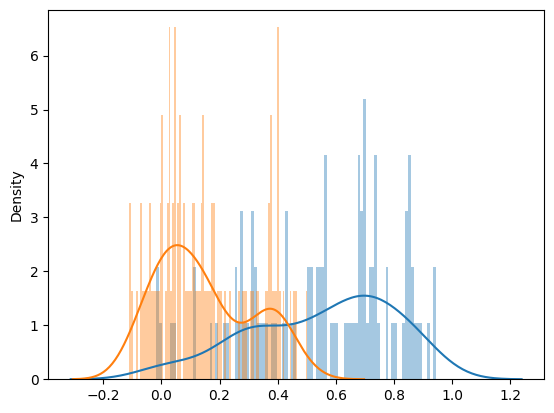

In [52]:
#blue earlier time step, orange later time step
compare_dist(10,11)

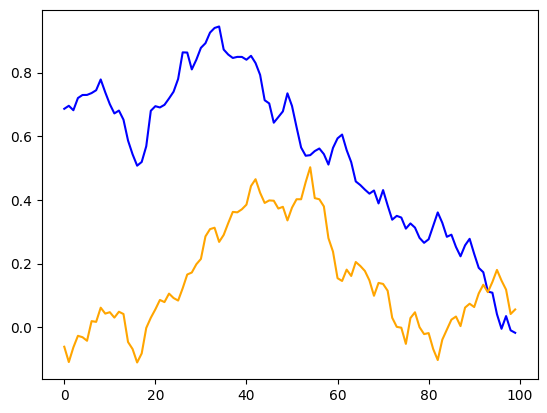

In [53]:
#blue earlier time step, orange later time step
compare_traj(10,11)

98.71253871115631


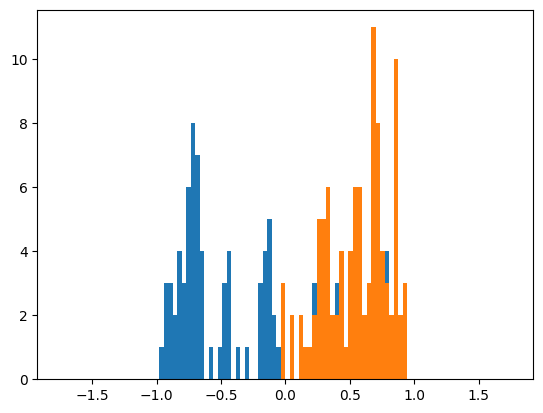

In [55]:
wd = Wasserstein_distance(9, 10, -1.75, 1.75, 100)
print(wd)